<a href="https://colab.research.google.com/github/pythonpdnp/MS_kofia/blob/main/07_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering With K Means

### 데이터 입력, 분석, 전처리

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ML_kofia2024/income.csv")

Text(0, 0.5, 'Income')

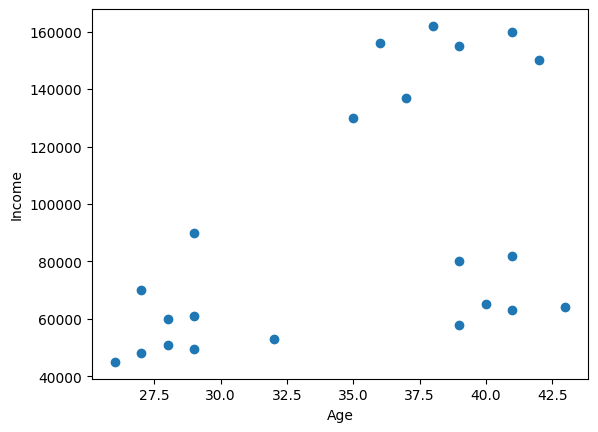

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.Age, df.Income)
plt.xlabel("Age")
plt.ylabel("Income")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age', 'Income']] = scaler.fit_transform(df[['Age', 'Income']])

df.head()

,Name,Age,Income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


# 데이터 학습, 분류

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['Age', 'Income']])

KMeans(n_clusters=3)

In [ ]:
df['cluster'] = kmeans.labels_
df.head()

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


Text(0.5, 1.0, 'KMeans Clustering (k=3)')

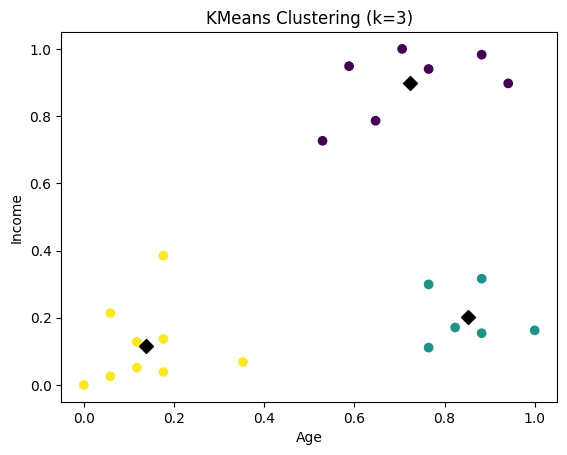

In [ ]:
plt.scatter(df.Age, df.Income, c=df.cluster)

# Centroid 시각화
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='D', s=50, color='black')

plt.xlabel("Age")
plt.ylabel("Income")
plt.title("KMeans Clustering (k=3)")

***Elbow Method For Optimal K***

Text(0, 0.5, 'WCSS')

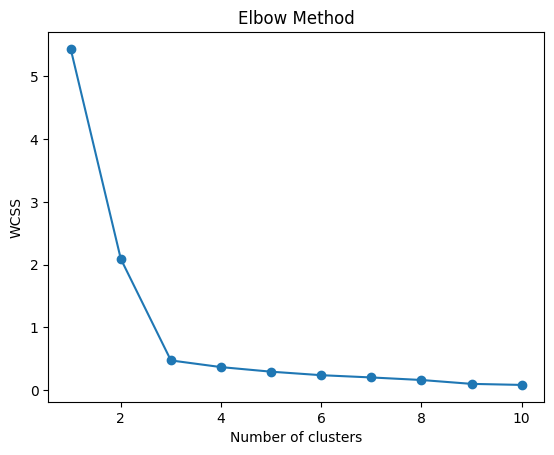

In [ ]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df[['Age', 'Income']])
    wcss.append(kmeans.inertia_)

# Elbow Method 시각화
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')